In [1]:
import networkx as nx

#Implementação do artigo 
#Module-based visualization of large-scale graph network data, 2017, Journal of Visualization

#Module Detection = 5 options
#tree-connection, concentration, circular, low-connectivity, and full-connectivity.

##Tree-connection:
#The tree-connection pattern indicates that the graph is extended from a node and that some children of the root still contain the children.

#https://networkx.org/documentation/stable/reference/algorithms/tree.html?highlight=tree

#print('is tree: ',nx.is_tree(G))

#print('is forest: ',nx.is_forest(G))

#print(nx.is_arborescence(G)) #only for directed networks

#print(nx.is_branching(G)) #only for directed networks

#Concentration:
#The concentration pattern indicates that all children nodes are connected to the root and that each child does not have other connections.

#print('is tree: ',nx.is_tree(G))

#Circular:
#The circular pattern indicates that each node in the graph only has two links. 

#print(nx.find_cycle(G))
#print(len(nx.find_cycle(G)))

def has_cycle(G):
    if len(nx.find_cycle(G)) > 0:
        return True
    else:
        return False
        

def is_circular(G):
    n = len(G.nodes())
    c = len(nx.find_cycle(G))
    if (c > 0) & (c == n):
        return True
    else:
        return False
        
        
#print('has cycles: ',has_cycle(G))

#Example of circular graph
#G = nx.Graph()
#G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

#print('is circular: ',is_circular(G))


#Full-connectivity:
#The full-connectivity pattern is a complete graph. 

def is_complete(G):
    n = len(G.nodes())
    e = len(G.edges())
    
    #n(n-1)/2, where n = number of nodes
    formula = n * (n-1)/2
    
    if e == formula:
        return True;
    else:
        return False;
    
#Example of complete graph
#G = nx.complete_graph(100)

#print('is complete: ',is_complete(G))

#Low-connectivity:
#The remaining structure of the graph will be classified as a low-connectivity pattern.

def is_low_connectivity(G):
    if ~is_complete_graph(G) & ~is_circular(G) & ~nx.is_tree(G) & ~nx.is_forest(G):
        return True
    else:
        return False
    
#print('is low connectivity: ',is_low_connectivity(G))


def is_star(G):
    if nx.is_tree(G):
        a = [x for x in G.nodes() if G.degree(x)==1]
        if len(a) == (len(G.nodes())-1):
            return True
        else:
            return False
    else:
        return False


def graph_topology(G):
    if is_star(G):
        return 'star'
    elif nx.is_tree(G):
        return 'tree'
    elif nx.is_forest(G):
        return 'forest'
    elif is_circular(G):
        return 'circular'
    elif is_complete(G):
        return 'complete'
    else:
        return 'low_connectivity'

In [3]:
#G = nx.Graph()
#G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

#G = nx.complete_graph(100)

#Pattern detection via k-clustering

#By following the pattern design, we can denote

#https://latex.codecogs.com/eqneditor/editor.php
#\alpha = \frac{\max(e_i)}{\sum e_i}, 
#\beta = \frac{count(e_i=2)}{n}, 
#\delta = \frac{1}{n}count(e_i > \frac{n}{2}), 
#where e_i denotes the neighbor count of node i and n denotes the node count of the module. 

import statistics

def graph_feature_vector(G):

    x = []
    y = []
    z = []
    for i in G.nodes():

        e = list(G.neighbors(i))

        e_i = len(list(G.neighbors(i)))
        n = len(G.nodes())


        #from sympy import *
        #x = symbols('x')

        alpha = round(max(e)/sum(e),2)

        #print('alpha',round(alpha,2))

        count = 0
        for ee in e:
            #print(len(list(G.neighbors(ee))), (n/2))
            if len(list(G.neighbors(ee))) == 2:
                count = count + 1

        beta = count / n

        #print('beta',beta)

        count = 0
        for ee in e:
            if len(list(G.neighbors(ee))) > (n/2):
                count = count + 1

        delta = (1/n) * count 

        a=[alpha,beta,delta]
        x.append(a[0])
        y.append(a[1])
        z.append(a[2])

    mean_x = round(statistics.mean(x),2)
    mean_y = round(statistics.mean(y),2)
    mean_z = round(statistics.mean(z),2)

    return [mean_x,mean_y,mean_z]

In [4]:
#G=nx.MultiGraph()
list_features = []

G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1)])

print(graph_topology(G),graph_feature_vector(G))
#list_features.append(graph_feature_vector(G))

G = nx.complete_graph(100)

print(graph_topology(G),graph_feature_vector(G))
#list_features.append(graph_feature_vector(G))

G = nx.Graph()
G.add_edges_from([(1, 5), (2, 5), (3, 5), (4, 5)])

print(graph_topology(G),graph_feature_vector(G))
#list_features.append(graph_feature_vector(G))

G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5)])

print(graph_topology(G),graph_feature_vector(G))
#list_features.append(graph_feature_vector(G))

G = nx.Graph()
G.add_edges_from([(6, 7),(7, 8),(8, 9), (1, 2), (2, 3), (3, 4), (4, 5)])

print(graph_topology(G),graph_feature_vector(G))
#list_features.append(graph_feature_vector(G))

G = nx.fast_gnp_random_graph(100, 0.2,1,False)

print(graph_topology(G),graph_feature_vector(G))
#list_features.append(graph_feature_vector(G))

#codigo de networkX para hypergraph
#https://github.com/pnnl/HyperNetX/blob/master/hypernetx/classes/hypergraph.py


circular [0.71, 0.5, 0.0]
complete [0.02, 0.0, 0.99]
star [0.88, 0.0, 0.16]
tree [0.81, 0.24, 0.0]
forest [0.8, 0.12, 0.0]
low_connectivity [0.11, 0.0, 0.0]


In [24]:
list_features

[[0.71, 0.5, 0.0],
 [0.02, 0.0, 0.99],
 [0.88, 0.0, 0.16],
 [0.81, 0.24, 0.0],
 [0.8, 0.12, 0.0],
 [0.11, 0.0, 0.0]]

In [6]:
#Temporal taxonomy
#Activity Frequency - Sporadic or Continuous
#To distinguish these scenarios, the time interval of the network ( T Final −T Initial ) is divided into sub-intervals of length S_I .
#If at least one of these intervals has no edges, the community has sporadic activity.

#If all intervals have at least one edge each, the community is classified as having continuous activity.

#S_I= Global average considering the time interval between two consecutive connections in each community

import statistics
import math

def get_timestamps(G):
    edges=sorted(G.edges(data='t'), key=lambda t: t[2])
    timestamp_list = []
    for e in edges:
        timestamp_list.append(e[2])
        
    return timestamp_list
      
#t_m is an optional parameter to divide timestamps
def time_frequency(G,t_m=-1):
    t_list = get_timestamps(G)
    if t_m == -1:
        t_m = round(statistics.mean(t_list))
        #print('t_m:',t_m)
    div = math.ceil((max(t_list) - min(t_list)) / t_m)    
    min_t = min(t_list)
    max_t = t_m
    x = 0
    while x < div:
        a = [i for i in t_list if (i >= min_t) & (i < max_t) ]
        #print(a)
        if len(a) == 0:
            return 'sporadic'
        min_t = max_t
        max_t = max_t + t_m
        x = x+1
    return 'continuous'




#Activity Dispersion - Dispersed or Grouped
#Suggestion: Activity Dispersion - Burst or Dispersed (?) Peak or Valley (?)
#A community has grouped activity if the majority of consecutive edges is too close to each other (according to a threshold T_dg ),
#or has dispersed activity otherwise.
#T_dg = The most frequent median time interval between two consecutive connections (mode of the medians)

from statistics import mean
from statistics import mode
from statistics import median

#Tem que existir muitas arestas juntas consecutivamente

def calculate_dispersion(G):
    t_list = get_timestamps(G)
    i = -1
    time_interval = []
    for t in t_list:
        if i == -1:
            i = t
        else:
            time_interval.append(t-i)
            i=t
            
    #print(time_interval)
    tdg = round(mode(time_interval))
    t_h = 0.3
    #print('mode',tdg)
    
    consecutive_interval_value = math.ceil(len(t_list) * t_h) #quantidade de instantes de tempo consecutivos que tem que ter pouco intervalo

    #print('consecutive_interval_value',consecutive_interval_value)
    
    count=0
    for i in time_interval:
        if count == consecutive_interval_value:
            return 'grouped'
        if i <= tdg:
            count = count+1
        else:
            count = 0
    
    return 'dispersed'
    
    
    #a = [i for i in time_interval if i < tdg ]
    #if (len(a) / len(time_interval)) < t_h:
        #return 'grouped'
    #else:
        #return 'dispersed'

In [7]:
#TEMPORAL NETWORKS
G = nx.MultiGraph()
G.add_edge(1,2,t=0)
G.add_edge(2,3,t=0)
G.add_edge(3,4,t=10)
G.add_edge(4,1,t=10)
G.add_edge(1,2,t=15)
G.add_edge(4,5,t=15)
G.add_edge(6,7,t=21)

print(time_frequency(G),calculate_dispersion(G))

G = nx.MultiGraph()
G.add_edge(1,2,t=0)
G.add_edge(2,3,t=0)
G.add_edge(3,4,t=10)
G.add_edge(4,1,t=10)
G.add_edge(1,2,t=15)
G.add_edge(4,5,t=15)
G.add_edge(6,7,t=21)
G.add_edge(6,1,t=50)

print(time_frequency(G),calculate_dispersion(G))

G = nx.MultiGraph()
G.add_edge(1,2,t=0)
G.add_edge(2,3,t=0)
G.add_edge(3,4,t=1)
G.add_edge(4,1,t=2)
G.add_edge(1,2,t=3)
G.add_edge(4,5,t=15)
G.add_edge(6,7,t=21)

print(time_frequency(G),calculate_dispersion(G))


G = nx.MultiGraph()
G.add_edge(1,2,t=0)
G.add_edge(2,3,t=2)
G.add_edge(3,4,t=4)
G.add_edge(4,1,t=6)
G.add_edge(1,2,t=8)
G.add_edge(4,5,t=12)

print(time_frequency(G),calculate_dispersion(G))

continuous dispersed
sporadic dispersed
sporadic grouped
continuous grouped


In [3]:
pip install matplotlib numpy pandas seaborn scikit-learn ipython

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install kneed

Note: you may need to restart the kernel to use updated packages.


In [10]:
#K-Means Clustering
#https://realpython.com/k-means-clustering-python/

import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

features, true_labels = make_blobs(
    n_samples=200,
    centers=3,
    cluster_std=2.75,
    random_state=42
)

In [11]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [12]:
true_labels[:5]

array([1, 0, 2, 2, 2])

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [14]:
kmeans = KMeans(
    init="random",
    n_clusters=6,
    n_init=10,
    max_iter=300,
    random_state=42
)

kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

In [15]:
kmeans.fit(list_features)

ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [47]:
# The lowest SSE value
kmeans.inertia_

0.0

In [48]:
# Final locations of the centroid
kmeans.cluster_centers_

array([[0.71, 0.5 , 0.  ],
       [0.02, 0.  , 0.99],
       [0.11, 0.  , 0.  ],
       [0.88, 0.  , 0.16],
       [0.8 , 0.12, 0.  ],
       [0.81, 0.24, 0.  ]])

In [49]:
# The number of iterations required to converge
kmeans.n_iter_

1

In [20]:
kmeans.labels_[:5]

array([5, 4, 2, 3, 3])

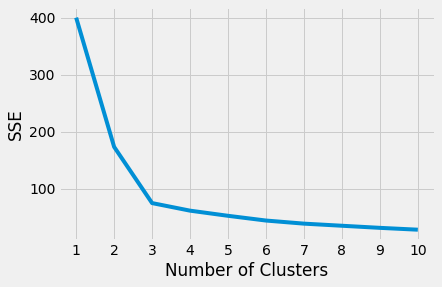

In [41]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [42]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [43]:
# A list holds the silhouette coefficients for each k
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_coefficients.append(score)

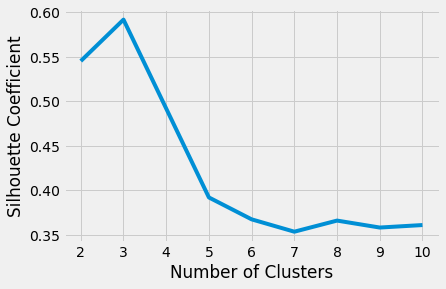

In [44]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
#Continuar em:
#Evaluating Clustering Performance Using Advanced Techniques
#https://realpython.com/k-means-clustering-python/

#3D KMEANS
#https://medium.com/analytics-vidhya/3d-visualization-of-k-means-clustering-47d3d3e82117